#Histogram Testing

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import itertools
%matplotlib inline

This notebook provides some simple tests for histograms I want to build using EBTEL-2fluid data, specifically the peak emission measure, the temperature at which this peak emission occurs, and the hot and cool shoulder slopes. 

The case we have is one where we vary some parameter $\beta$ and for each value of $\beta$, we have a resulting distribution. As a test case, consider a normal distribution where we vary the standard deviation, $\sigma$.

Let's first define a set of standard deviations and then build up a set of histograms for each value.

In [266]:
#set number of samples
num_samples=10000
#set the sigma vector
sigma = np.linspace(.5,1.5,20)
#set the bin edges
bin_edges=np.linspace(-2.0,2.0,100)

In [267]:
sigma_var_dist = []
sigma_var = []
for s in sigma:
    #build histogram
    hist,dummy_bins = np.histogram(scs.norm.rvs(scale=s,size=num_samples),bins=bin_edges)
    #append to list
    sigma_var.append(scs.norm.rvs(scale=s,size=num_samples))
    sigma_var_dist.append(hist)

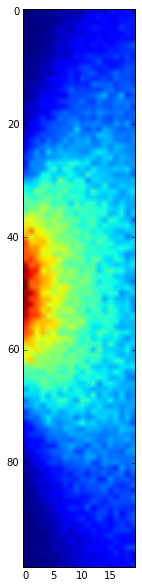

In [268]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.imshow(np.transpose(sigma_var_dist))
plt.show()

But what if instead we vary the mean?

In [269]:
mu =np.linspace(-1,1,len(sigma))

In [270]:
mu_var_dist = []
mu_var = []
for m in mu:
    #build histogram
    hist,dummy_bins = np.histogram(scs.norm.rvs(loc=m,size=num_samples),bins=bin_edges)
    #append to list
    mu_var_dist.append(hist)
    mu_var.append(scs.norm.rvs(loc=m,size=num_samples))

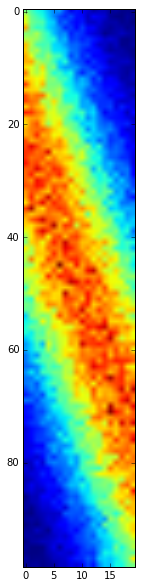

In [271]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.imshow(np.transpose(mu_var_dist))
plt.show()

This is somewhat hacked together and we have no $x$ or $y$ scale. Plus, it gives all this extra blue color that we don't really want. What if instead we just plotted, in "1D", the resulting points per histogram or instead constructing a 2D histogram.

In [272]:
#flatten the mu and sigma variables
sigma_var_flat = list(itertools.chain(*sigma_var))
mu_var_flat = list(itertools.chain(*mu_var))
#flatten the sigma and mu lists
sigma_flat = []
for i in range(len(sigma)):
    [sigma_flat.append(sigma[i]) for j in range(len(sigma_var[i]))]
mu_flat = []
for i in range(len(mu)):
    [mu_flat.append(mu[i]) for j in range(len(mu_var[i]))]

In [273]:
sigma_bins = np.append(sigma,sigma[-1]+np.fabs(sigma[0]-sigma[1])/100.0)
hist_2d,xedge,yedge=np.histogram2d(sigma_flat,sigma_var_flat,bins=(sigma_bins,bin_edges))
#mask values with zero
hist_sigma_masked = np.ma.masked_where(hist_2d==0.0,hist_2d)

In [274]:
xcenters = xedge[0:-1]+np.diff(xedge)
ycenters = yedge[0:-1]+np.diff(yedge)
xmesh,ymesh=np.meshgrid(xcenters,ycenters)

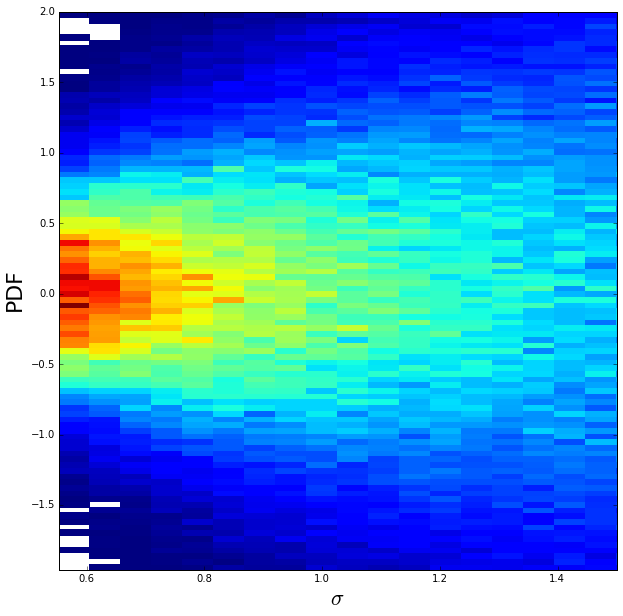

In [275]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.pcolormesh(xmesh,ymesh,np.transpose(hist_sigma_masked))
ax.set_xlabel(r'$\sigma$',fontsize=22)
ax.set_ylabel(r'PDF',fontsize=22)
ax.set_xlim([np.min(xmesh),np.max(xmesh)])
ax.set_ylim([np.min(ymesh),np.max(ymesh)])
plt.show()

In [276]:
#make 2D histogram
mu_bins = np.append(mu,mu[-1]+np.fabs(mu[0]-mu[1])/100.0)
hist_2d,xedge,yedge=np.histogram2d(mu_flat,mu_var_flat,bins=(mu_bins,bin_edges))
#mask zero entries
hist_mu_masked = np.ma.masked_where(hist_2d==0.0,hist_2d)
#make the meshgrids
xcenters = xedge[0:-1]+np.diff(xedge)
ycenters = yedge[0:-1]+np.diff(yedge)
xmesh,ymesh=np.meshgrid(xcenters,ycenters)

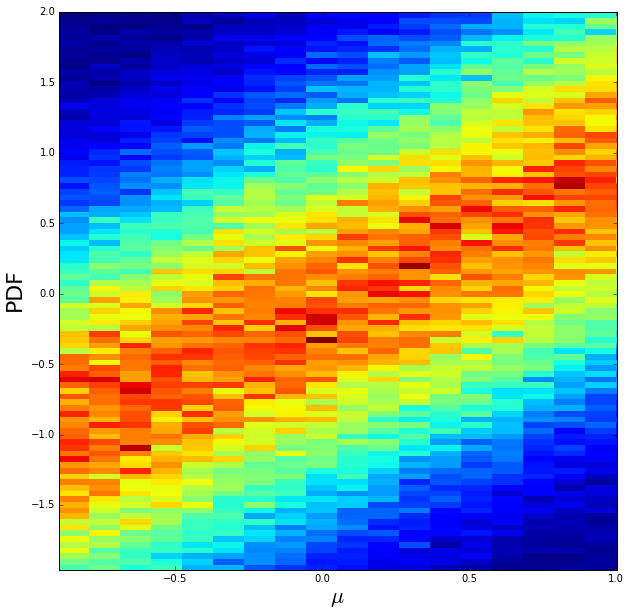

In [277]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.pcolormesh(xmesh,ymesh,np.transpose(hist_mu_masked))
ax.set_xlabel(r'$\mu$',fontsize=22)
ax.set_ylabel(r'PDF',fontsize=22)
ax.set_xlim([np.min(xmesh),np.max(xmesh)])
ax.set_ylim([np.min(ymesh),np.max(ymesh)])
plt.show()

Thus, we can in principle do the same for our EM and $T_{max}$ values to show the resulting distributions for our different parameters at each value of the reheating time, $T_n$. For now, error bars seem to be sufficient.